# Mobile Price Classification

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.14.0


In [3]:
#Reading the dataset
mob_df=pd.read_csv("train (1).csv")

In [4]:
mob_df.head(2)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  

[2 rows x 21 columns]

In [5]:
mob_df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [6]:
mob_df.shape

(2000, 21)

In [7]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
mob_df['price_range'].value_counts()


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

The target variable is pretty much balanced out

Checking and Handling Null and Duplicate values

In [9]:
mob_df.isnull().sum()
# No Null values present 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Outlier Detection and Elimination

In [10]:
import numpy as np
import pandas as pd

# load data from CSV file
data = pd.read_csv('train (1).csv')

# calculate the interquartile range (IQR) for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# identify outliers using the IQR method
outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# remove outliers from the dataset
clean_data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# print the number of outlier data points
print('Number of outliers:', len(outliers))

# print the shape of the clean dataset
print('Shape of clean dataset:', clean_data.shape)

Number of outliers: 494
Shape of clean dataset: (1506, 21)


In [11]:
clean_data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
5       0.7        164        1  ...       1004      1654  1067    17     1   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
5            10        1             0     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1506 rows x 21 columns]

Exploratory Data Analysis

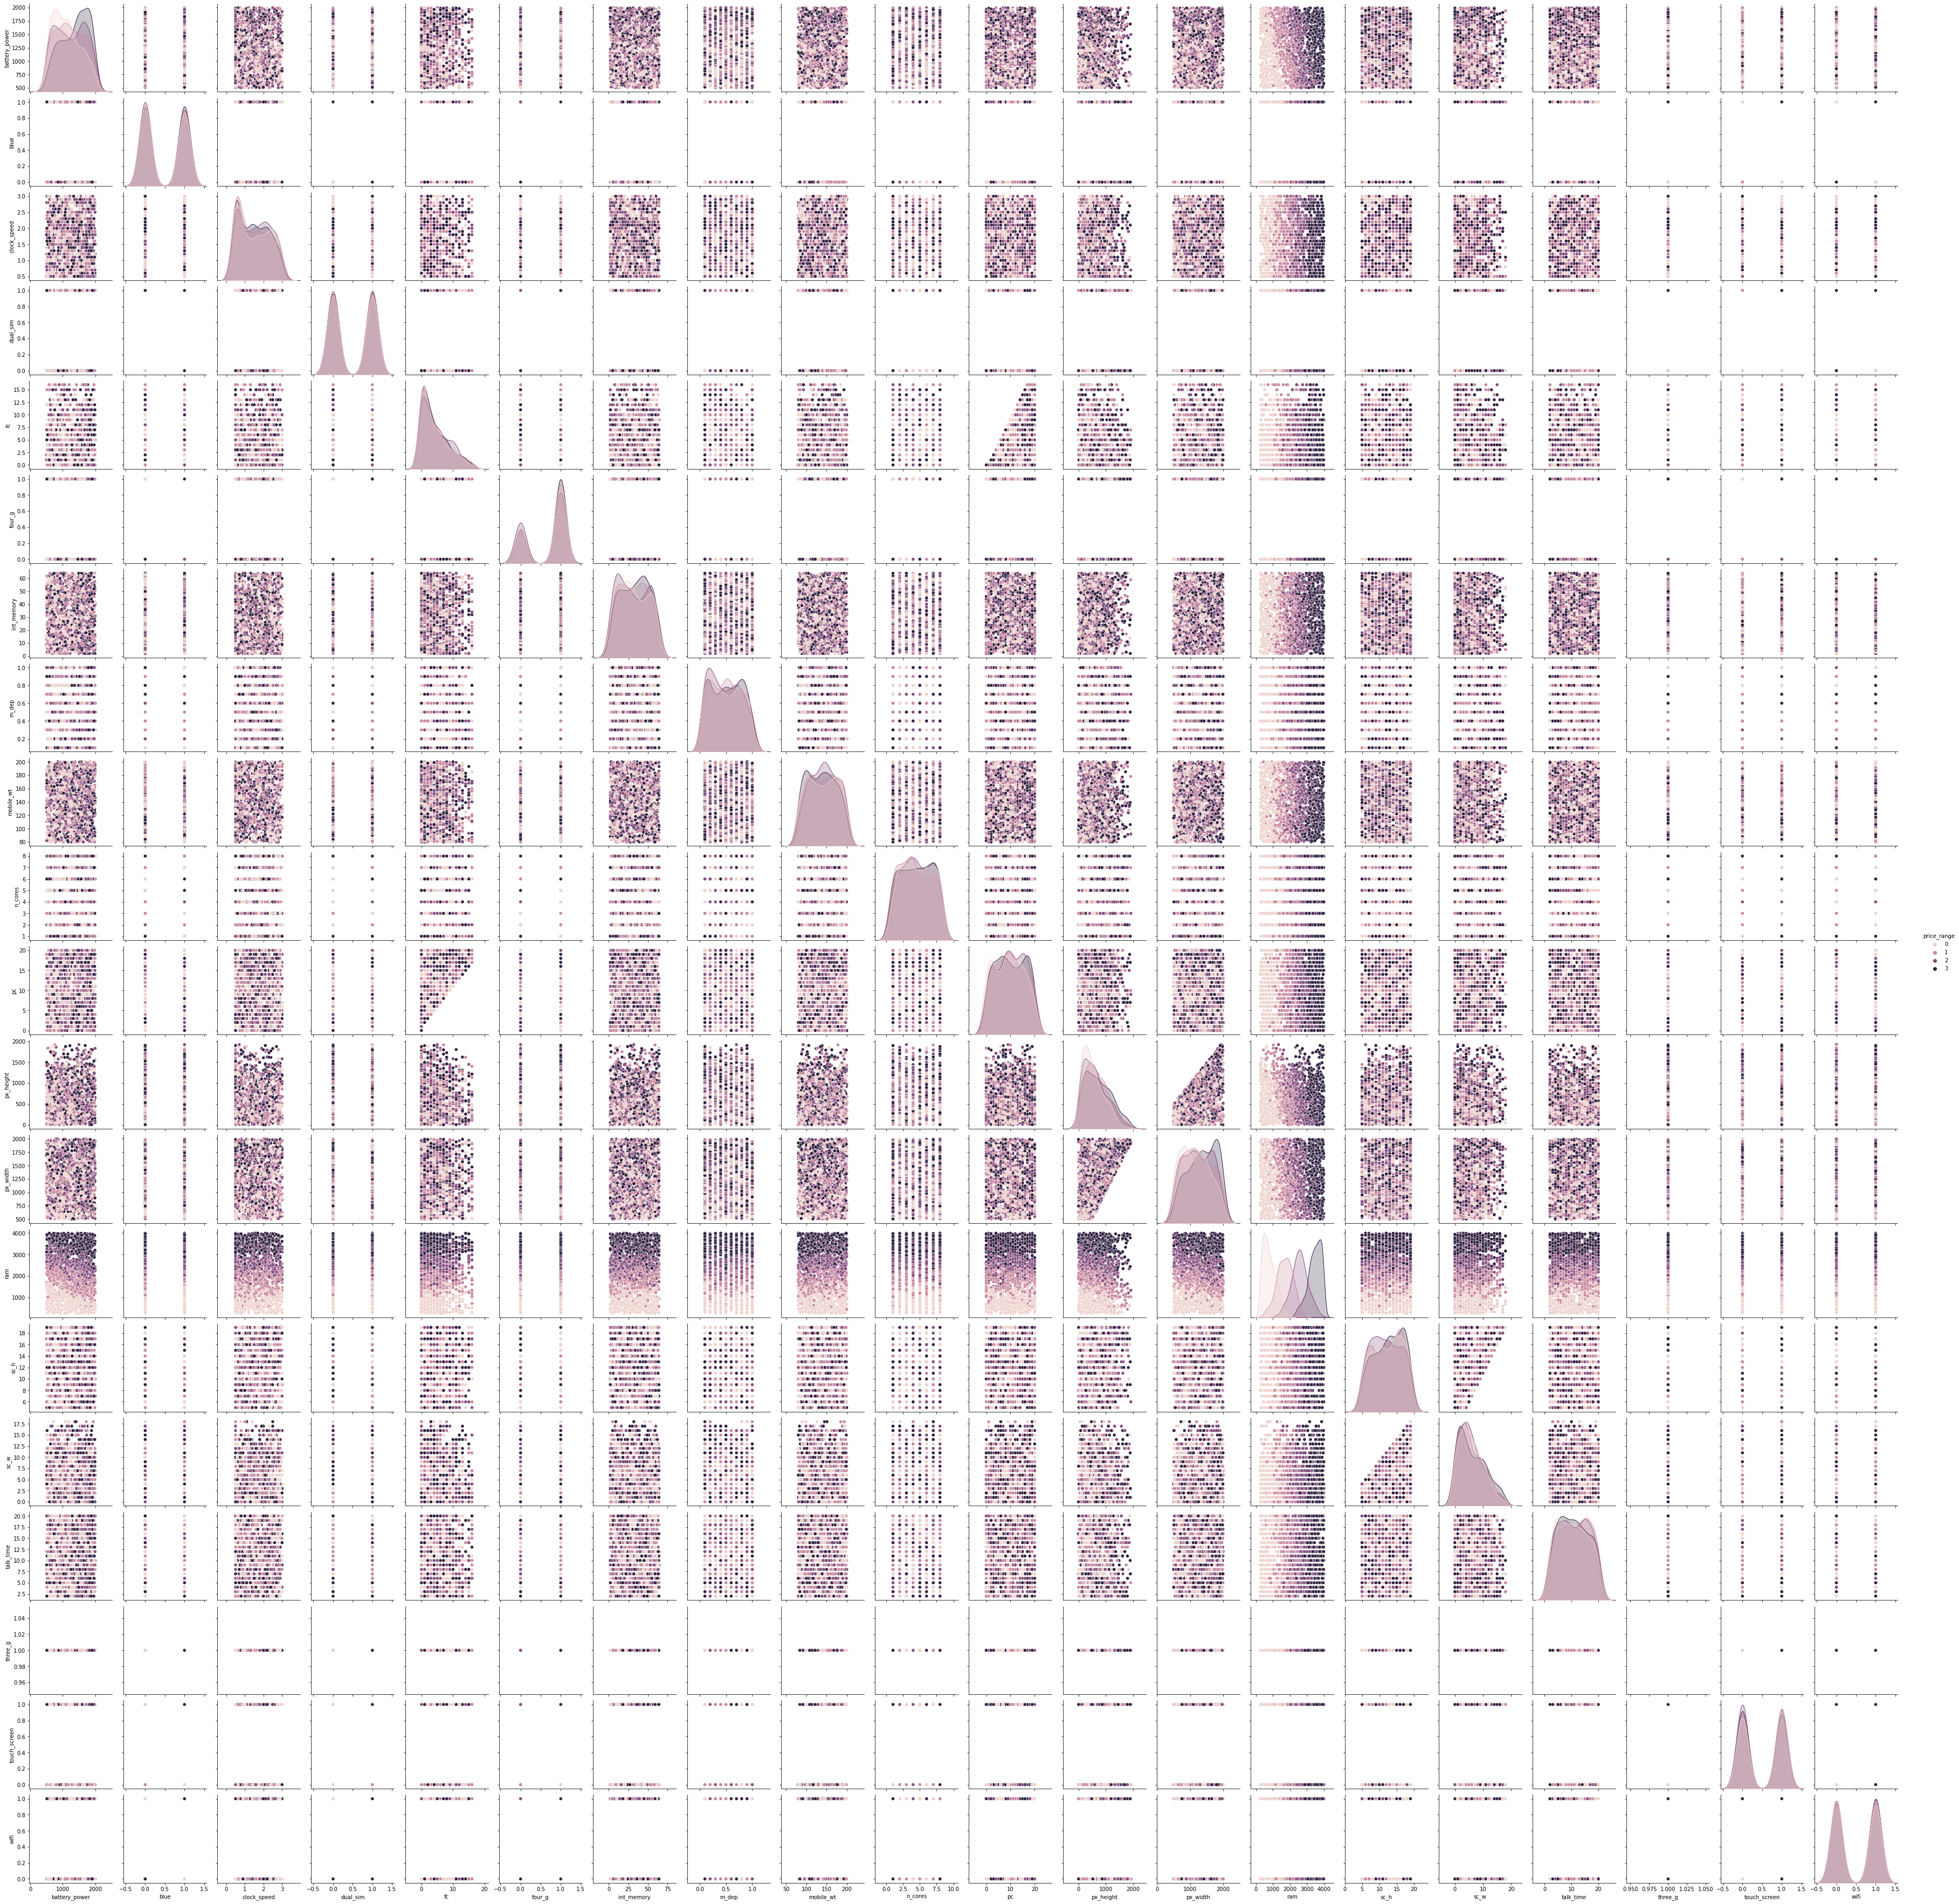

In [12]:
#Pairplot
sns.pairplot(clean_data,hue='price_range')

# Bivariate Analysis

Relation between fc(Front Camera Mega Pixels) and pc(Primary Camera Mega Pixels)

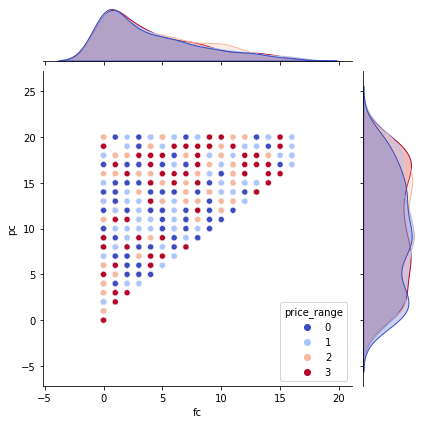

In [13]:
sns.jointplot(x='fc',y='pc',data=clean_data,kind='scatter',hue='price_range',palette='coolwarm')

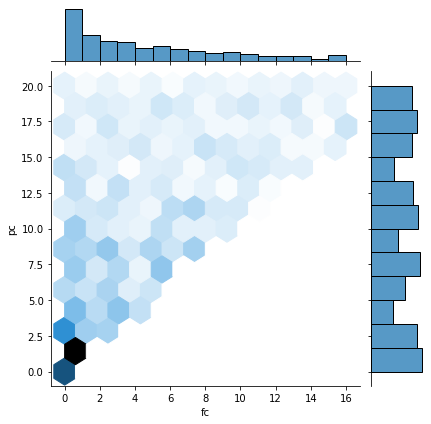

In [14]:
sns.jointplot(x='fc',y='pc',data=clean_data,kind='hex')

Relation between battery power and ram

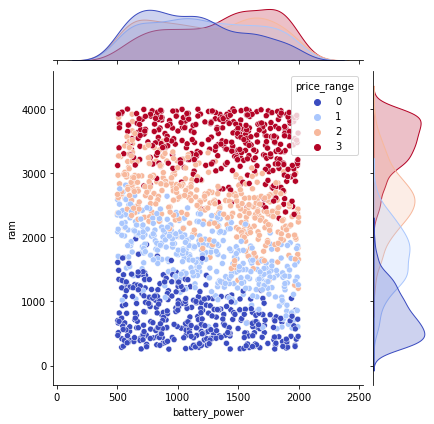

In [15]:
sns.jointplot(x='battery_power',y='ram',data=clean_data,kind='scatter',hue='price_range',palette='coolwarm')

The above graph specifies that the mobiles having high battery power and high ram lie in the category of higher price range and vice versa

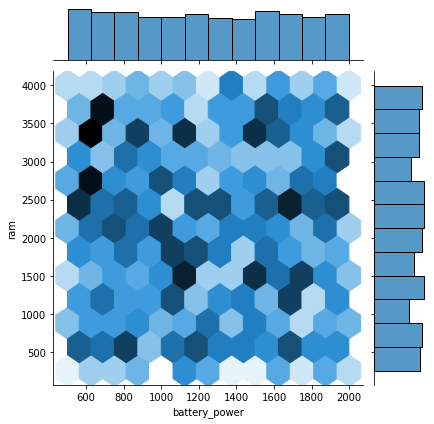

In [16]:
sns.jointplot(x='battery_power',y='ram',data=clean_data,kind='hex')

Relation between Clock speed and Ram

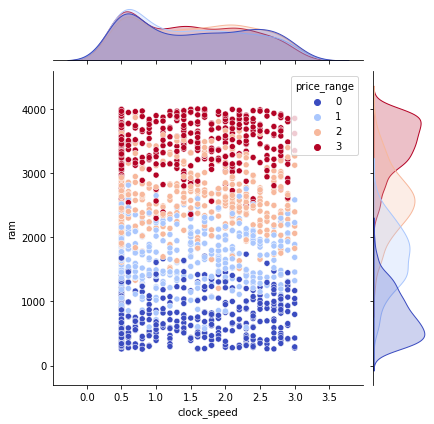

In [17]:
sns.jointplot(x='clock_speed',y='ram',data=clean_data,kind='scatter',hue='price_range',palette='coolwarm')

The above graph specifies that the mobiles having higher clock speed and high amount of ram usually lie in the category of expensive mobiles. Hence, while buying a mobile these visuals should be taken into consideration.

There are mobiles having low clock speed and higher ram and they too lie in the expensive range. Hence, the user should first decide that into which parameter is he/she looking while buying a mobile.

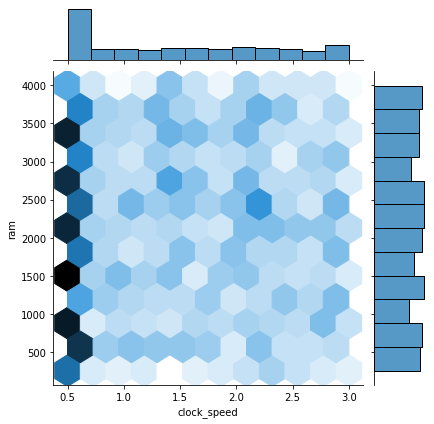

In [18]:
sns.jointplot(x='clock_speed',y='ram',data=clean_data,kind='hex')

Relation Between Battery Power and Clock Speed

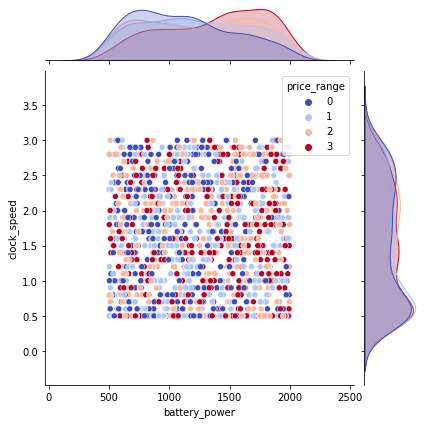

In [19]:
sns.jointplot(x='battery_power',y='clock_speed',data=clean_data,kind='scatter',hue='price_range',palette='coolwarm')

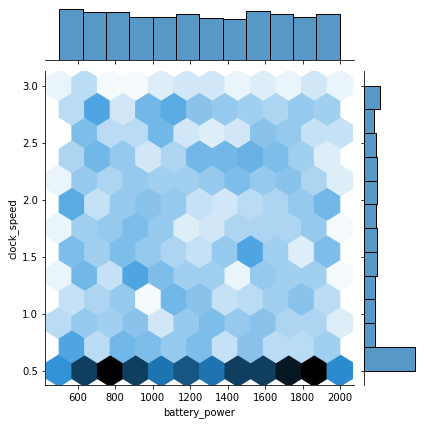

In [20]:
sns.jointplot(x='battery_power',y='clock_speed',data=clean_data,kind='hex',palette='coolwarm')

Relation Between N_cores and Ram

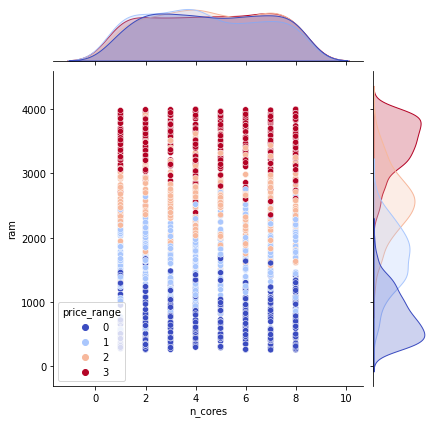

In [21]:
sns.jointplot(x='n_cores',y='ram',data=clean_data,hue='price_range',kind='scatter',palette='coolwarm')

# Univariate Analysis

In [22]:
clean_data['n_cores'].iplot(kind='histogram',xTitle='n_cores',yTitle='Frequency')
# Histogram plot for number of cores

Text(0.5, 0, 'mobile weight')

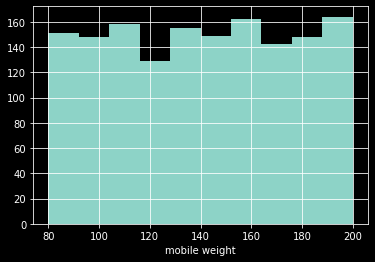

In [23]:
# Histogram plot for mobile weight
plt.style.use('dark_background')
clean_data['mobile_wt'].hist()
plt.xlabel('mobile weight')

<AxesSubplot:xlabel='price_range', ylabel='ram'>

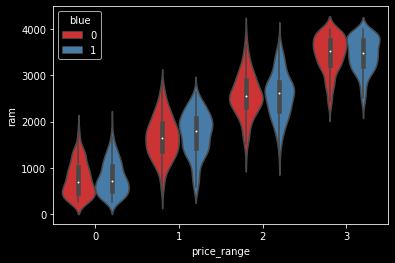

In [24]:
#Violin Plot relation between price range and ram justified with the presence of bluetooth
sns.violinplot(x="price_range", y='ram', data=clean_data,hue='blue',palette='Set1')

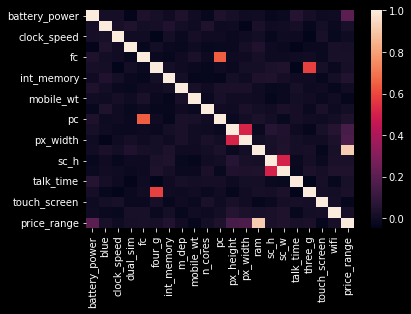

In [25]:
#co-relation using heatmap
plt.figure()
sns.heatmap(mob_df.corr())
plt.show()

# Deciding input features and splitting the dataset

According to the given dataset, the input features are everything except price range, as they are the parameters which play a vital role in deciding the price range of a specific brand of mobile phone

Therefore, splitting the dataset into X and y and further splitting it into training and testing data

In [26]:
X=clean_data.drop('price_range',axis=1)
y=clean_data['price_range']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Since, it is a classification problem we will be using classification algorithm to solve the given problem.

Some of the classification algorithms are:

1) Logistic Regression

2) KNN

3) Decision Tress and Random Forest

4) Support Vector Machines

# 1) Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()

In [31]:
logmod.fit(X_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [32]:
predictions = logmod.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) #Certain Parameters get affected if we run the get dummies operations on the 
# Pclass column

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       131
           1       0.52      0.64      0.57        98
           2       0.52      0.47      0.49       103
           3       0.76      0.80      0.78       120

    accuracy                           0.68       452
   macro avg       0.67      0.67      0.67       452
weighted avg       0.69      0.68      0.68       452



In [34]:
from sklearn.metrics import accuracy_score
accuracy_logistic = accuracy_score(y_test, predictions)
print('Accuracy Score:', accuracy_logistic)

Accuracy Score: 0.6792035398230089


# 2) KNN 

In [35]:
clean_data.head(2)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  price_range  
1        1             1     0            2  
2        1             1     0            2  

[2 rows x 21 columns]

Splitting Data into X and y

In [36]:
X=clean_data.drop('price_range',axis=1)
y=clean_data['price_range']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

#predicting test data
pred_y = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
score_knn = accuracy_score(y_test,pred_y)
score_knn

#classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        88
           1       0.90      0.89      0.89        71
           2       0.86      0.89      0.87        66
           3       0.96      0.90      0.93        77

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



In [39]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

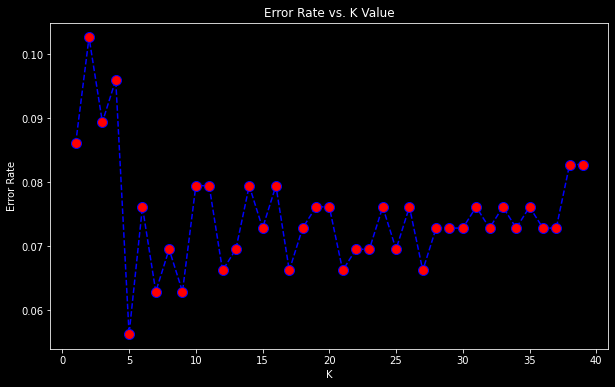

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above graph we can conclude that having a K value of 5 will be giving us a maximum accuracy and minimum error rate of less than 0.06. Therefore new K value if 5.

In [41]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[85  3  0  0]
 [ 6 63  2  0]
 [ 0  4 59  3]
 [ 0  0  8 69]]


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        88
           1       0.90      0.89      0.89        71
           2       0.86      0.89      0.87        66
           3       0.96      0.90      0.93        77

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.91      0.91      0.91       302



In [42]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[86  2  0  0]
 [ 4 63  4  0]
 [ 0  5 61  0]
 [ 0  0  2 75]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.90      0.89      0.89        71
           2       0.91      0.92      0.92        66
           3       1.00      0.97      0.99        77

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



Having a K value of 5 gives us a maximum accuracy of 94%. Therefore final K value is 5.

In [43]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test,pred)
print("Accuracy Score of KNN is: ",accuracy_knn)

Accuracy Score of KNN is:  0.9437086092715232


# Decision Tree and Random Forest

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X=clean_data.drop('price_range',axis=1)
y=clean_data['price_range']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()  #Single Decision Tree
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
predictions = dtree.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[79  9  0  0]
 [ 4 61  6  0]
 [ 0  7 53  6]
 [ 0  0  6 71]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        88
           1       0.79      0.86      0.82        71
           2       0.82      0.80      0.81        66
           3       0.92      0.92      0.92        77

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.88      0.87      0.87       302



In [51]:
from sklearn.metrics import accuracy_score
accuracy_decisiontree = accuracy_score(y_test, predictions)
print('Accuracy Score:', accuracy_decisiontree)

Accuracy Score: 0.8741721854304636


# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
rfc_pred = rfc.predict(X_test)

In [54]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[83  5  0  0]
 [12 55  4  0]
 [ 0 12 53  1]
 [ 0  0  7 70]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        88
           1       0.76      0.77      0.77        71
           2       0.83      0.80      0.82        66
           3       0.99      0.91      0.95        77

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.87      0.86      0.86       302



In [55]:
from sklearn.metrics import accuracy_score
accuracy_randomforest = accuracy_score(y_test, rfc_pred)
print('Accuracy Score:', accuracy_randomforest)

Accuracy Score: 0.8642384105960265


# Support Vector Machines

In [56]:
X=clean_data.drop('price_range',axis=1)
y=clean_data['price_range']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [58]:
from sklearn.svm import SVC
model=SVC()

In [59]:
model.fit(X_train,y_train)

SVC()

## Predictions and Evaluations

Now let's predict using the trained model.

In [60]:
predictions=model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[118   3   0   0]
 [  6  98   3   0]
 [  0   6  96   2]
 [  0   0   2 118]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       121
           1       0.92      0.92      0.92       107
           2       0.95      0.92      0.94       104
           3       0.98      0.98      0.98       120

    accuracy                           0.95       452
   macro avg       0.95      0.95      0.95       452
weighted avg       0.95      0.95      0.95       452



Even though we got 95% accuracy still we are going to adjust some parameters by using GridSearchCV so as to make the model more accurate

In [62]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']} 

In [63]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [64]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   1.3s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.981 total time=   0.5s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.962 total time=   0.4s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.976 total time=   2.9s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.943 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.265 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.265 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.265 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.265 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.262 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.943 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly

[CV 4/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.943 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.938 total time=   0.0s
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.972 total time=  12.2s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.981 total time=  16.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.967 total time=   0.8s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.967 total time=   6.5s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.943 total time=   0.4s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.265 total time=   0.1s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.265 total time=   0.1s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.265 total time=   0.1s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.265 total time=   0.1s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.262 total time=   0.1s
[CV 1/5] END ........C=10, g

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [65]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [66]:
grid.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='linear')

Using the new found parameters to predict the results.

In [67]:
svm_grid_predictions = grid.predict(X_test)

In [68]:
print(confusion_matrix(y_test,svm_grid_predictions))
print(classification_report(y_test,svm_grid_predictions))

[[121   0   0   0]
 [  2 101   4   0]
 [  0   3 100   1]
 [  0   0   5 115]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       121
           1       0.97      0.94      0.96       107
           2       0.92      0.96      0.94       104
           3       0.99      0.96      0.97       120

    accuracy                           0.97       452
   macro avg       0.97      0.97      0.97       452
weighted avg       0.97      0.97      0.97       452



As mentioned above, by using GridSearchCV we got some finely adjusted parameters of the SVM model and hence the model is more accurate now.

In [69]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, svm_grid_predictions)
print('Accuracy Score:', accuracy_svm)

Accuracy Score: 0.9668141592920354


In [70]:
X=clean_data.drop('price_range',axis=1)
y=clean_data['price_range']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [71]:
#Naive Bayes 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

#predicting test data
pred_y = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_y)
cm

#accuracy score
from sklearn.metrics import accuracy_score
accuracy_nb = accuracy_score(y_test,pred_y)
accuracy_nb

#classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        88
           1       0.69      0.72      0.70        71
           2       0.70      0.71      0.71        66
           3       0.97      0.87      0.92        77

    accuracy                           0.82       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.82      0.82      0.82       302



In [72]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

#predicting test data
y_pred = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

#accuracy score
from sklearn.metrics import accuracy_score
accuracy_gb = accuracy_score(y_test,pred_y)
accuracy_gb

#classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test,pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        88
           1       0.69      0.72      0.70        71
           2       0.70      0.71      0.71        66
           3       0.97      0.87      0.92        77

    accuracy                           0.82       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.82      0.82      0.82       302



In [73]:
#XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

#predicting test data
y_pred = model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

#accuracy score
from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_test,y_pred)
accuracy_xgb

#classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        88
           1       0.88      0.83      0.86        71
           2       0.87      0.94      0.91        66
           3       0.99      0.94      0.96        77

    accuracy                           0.91       302
   macro avg       0.91      0.91      0.91       302
weighted avg       0.92      0.91      0.91       302



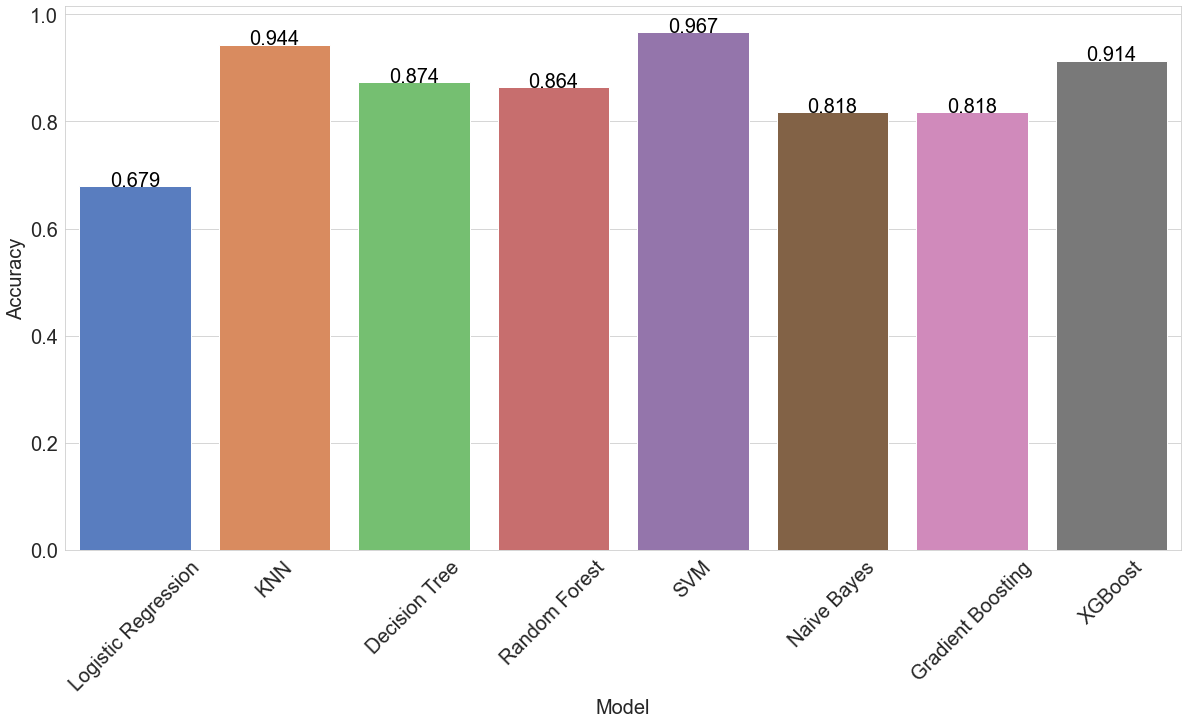

In [77]:
# plot the bar graph to compare accuracy of above models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=20)
plt.figure(figsize=(20,10))
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','SVM','Naive Bayes','Gradient Boosting', 'XGBoost']
accuracy_scores = [accuracy_logistic, accuracy_knn, accuracy_decisiontree, accuracy_randomforest,accuracy_svm,accuracy_nb,accuracy_gb,accuracy_xgb] 
df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})
sns.set_style("whitegrid")
sns.barplot(x='Model', y='Accuracy',palette='muted', data=df)
plt.xticks(rotation=45)
#show values on top
for index, row in df.iterrows():
    plt.text(row.name,row.Accuracy, round(row.Accuracy,3), color='black', ha="center")
plt.show()

So, according to the above graph we can conclude that SVM is the best classification algorithm that matches our requirements with the highest accuracy of 97%.

In [75]:
#Testing SVM Model on custom inputs
data = np.array([[1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0]])
prediction = grid.predict(data)
print(prediction)

[0]


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [78]:
#Loading the model
import pickle
pickle.dump(grid, open('mobile.pkl','wb'))